# XGBoosting with Python · Customer Feedback

Completed by [Anton Starshev](http://linkedin.com/in/starshev) on 11/10/2024

### Context

This activity is a continuation of the airline's churn rating project in which I built decision tree and random forest models. I used the same data, but this time I trained, tuned, and evaluated an XGBoost model. In addition, I explored the feature importances of the model and identified the features that most contribute to customer satisfaction.

### Data

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others.

### Execution

Began with importing statements.

In [81]:
import numpy as np
import pandas as pd
import matplotlib as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as m

from xgboost import XGBClassifier
from xgboost import plot_importance

Loaded the dataset.

In [49]:
airline_data = pd.read_csv('Invistico_Airline.csv')

Examined the first 10 rows of data to familiarize yourself with the dataset.

In [50]:
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Displayed the data type for each column.

In [51]:
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

Checked the shape of data, counted and erased null values, and checked the shape again.

In [52]:
airline_data.shape

(129880, 22)

In [53]:
airline_data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [54]:
airline_data.dropna(inplace = True)

In [55]:
airline_data.shape

(129487, 22)

Confirmed the absence of nulls.

In [56]:
airline_data.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

Labeled the target variable `satisfaction` in a binary way as 0 and 1.

In [57]:
airline_data['satisfaction'] = airline_data['satisfaction'].map({'satisfied' : 1, 'dissatisfied' : 0})

Displayed data types one more time.

In [58]:
airline_data.dtypes

satisfaction                           int64
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

Converted string variables into binary format and saved the resulting data into a variable called `airline_data_dummies`.

In [59]:
airline_data_dummies = pd.get_dummies(airline_data, drop_first = True)

Displayed data types of the resulting dataset.

In [60]:
airline_data_dummies.dtypes

satisfaction                           int64
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer         bool
Type of Travel_Personal Travel          bool
Class_Eco                               bool
Class_Eco 

Converted the resulting encoded columns from boolean to integer type.

In [61]:
airline_data_dummies['Customer Type_disloyal Customer'] = airline_data_dummies['Customer Type_disloyal Customer'].astype(int)
airline_data_dummies['Type of Travel_Personal Travel'] = airline_data_dummies['Type of Travel_Personal Travel'].astype(int)
airline_data_dummies['Class_Eco'] = airline_data_dummies['Class_Eco'].astype(int)
airline_data_dummies['Class_Eco Plus'] = airline_data_dummies['Class_Eco Plus'].astype(int)

Confirmed all datatypes being ready for model building.

In [62]:
airline_data_dummies.dtypes

satisfaction                           int64
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_disloyal Customer        int64
Type of Travel_Personal Travel         int64
Class_Eco                              int64
Class_Eco 

Now, isolated my target and predictor variables.

In [64]:
x = airline_data_dummies.drop(columns = 'satisfaction', axis = 1)
y = airline_data_dummies['satisfaction']

In [65]:
x.shape

(129487, 22)

In [66]:
y.shape

(129487,)

Divided the data into a training set (75% of the data) and test set (25% of the data).

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

Defined the parameters for hyperparameter tuning. Specifically, considered tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`. Considered a more limited range for each hyperparameter to allow for timely iteration and model training. Defined metrics for model assessment as well. Finally, instantiated an XGBClassifer with logistic objective and transfered the model object into GridSearchCV constructor together with parameters and metrics.

In [75]:
params = {'max_depth': [4, 6], 
          'min_child_weight': [3, 5],
          'learning_rate': [0.1, 0.2, 0.3],
          'n_estimators': [5,10,15],
          'subsample': [0.7],
          'colsample_bytree': [0.7]}

metrics = ['accuracy', 'precision', 'recall', 'f1']

xgb_cv = GridSearchCV(XGBClassifier(objective = 'binary:logistic'),
                      params,
                      scoring = metrics,
                      cv = 5,
                      refit = 'f1')

Fitted the GridSearchCV model to the training data.

In [76]:
%%time

xgb_cv = xgb_cv.fit(x_train, y_train)
xgb_cv

CPU times: user 3min 16s, sys: 13.4 s, total: 3min 29s
Wall time: 1min 3s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

Obtained the optimal model's predictions on the test set.

In [77]:
predictions = xgb_cv.best_estimator_.predict(x_test)

Applied a series of metrics from scikit-learn to assess the best model. Specifically, printed the accuracy score, precision score, recall score, and f1 score associated with the test data and predicted values.

In [82]:
ac_score = m.accuracy_score(y_test, predictions)
print('accuracy score:', ac_score)

pc_score = m.precision_score(y_test, predictions)
print('precision score:', pc_score)

rc_score = m.recall_score(y_test, predictions)
print('recall score:', rc_score)

f1_score = m.f1_score(y_test, predictions)
print('f1 score:', f1_score)

accuracy score: 0.9303719263561102
precision score: 0.939647851440865
recall score: 0.9332021366319933
f1 score: 0.9364139020537124


Created a confusion matrix based on predicted values for the test set.

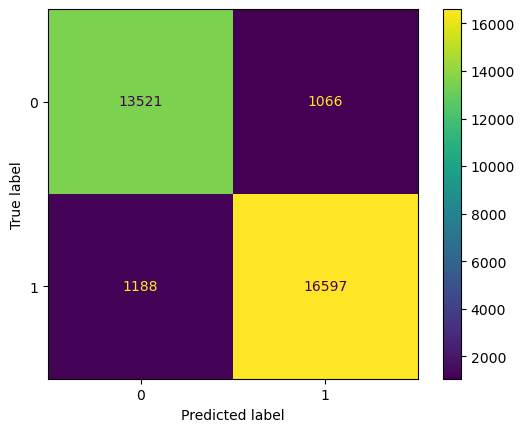

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels = xgb_cv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = xgb_cv.best_estimator_.classes_)
disp.plot()

Plotted the ROC curve for the best model.

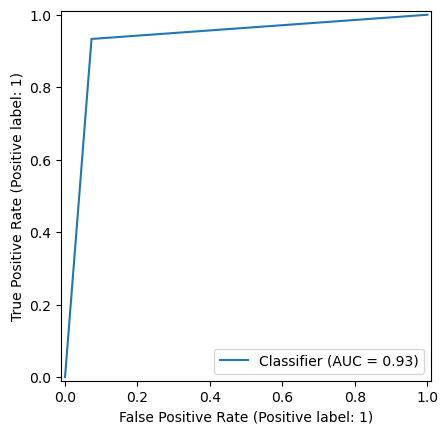

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score
RocCurveDisplay.from_predictions(y_test, predictions)
plt.show()

Calculated the AUC metric for the best model.

In [90]:
roc_auc_score(y_test, predictions)

0.9300616839326417

Visualized most important features used by the best classifier.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

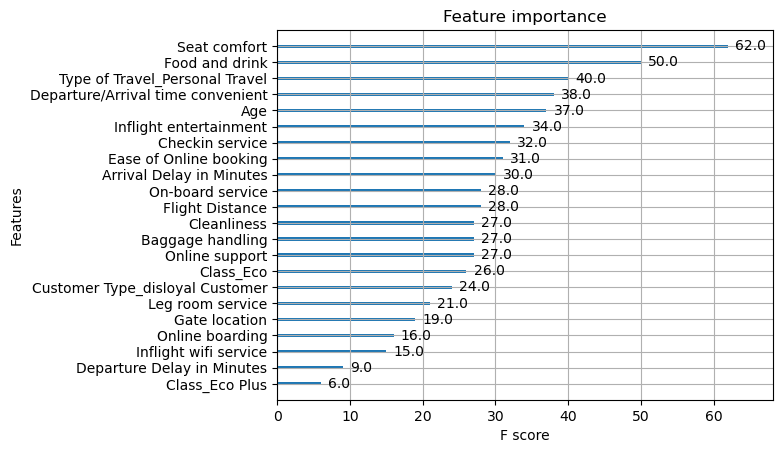

In [91]:
plot_importance(xgb_cv.best_estimator_)

**Observations and conclusions:**

- Precision and recall metrics stay above 93% and show the model's perfect capability to mitigate both false positives and false negatives in its predictions.
- An f1 score of 93.6% which is the harmonic mean between precision and recall confirms the previous thesis as well.
- A quite high accuracy score of 93,03% shows the level of the model's overall predicting power.
- The AUC score of 93% means that the model conducts predicting tasks almost 2 times better than random guesiing, which potentially can save a lot of money in measuring churn potentials.
- `Seat comfort` rated as most important in the model, which warrants additional investigation. It will be important to ask domain experts why they believe this feature scores so highly in this model.
- `Food and drink` gets the second prize in feature importance hierarchy.
- Surprisingly, delays (both arrival and departure) did not score as highly important.

### Acknowledgment

I would like to express gratitude to Google and Coursera for supporting the educational process and providing the opportunity to refine and showcase skills acquired during the courses by completing real-life scenario portfolio projects, such as this.

### Reference

This is a workplace scenario project proposed within the syllabus of Google Advanced Data Analytics Professional Certificate on Coursera.